<a href="https://colab.research.google.com/github/ggronda/Stereotypical-Behaviour-Classification-in-mice/blob/main/Supervised_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self-comments


quiero  probar una red neuronal, y me gusta el SDGC de scikit-learn, ver como poder hacerlo.


#Functions


In [ ]:
import re
def info_from_path(video_path) -> dict():
    # Extract Mouse number, date, and video type from the path using regular expressions
    match = re.search(r'Mouse(\d+)_([\d-]+)_.*?beh-(CROP|CROP1)\.avi', video_path)
    if match:
        mouse_number = match.group(1)
        date = match.group(2)
        video_format = 'Top' if match.group(3) == 'CROP' else 'Lateral'
        info_dict = {
            'MouseNumber': mouse_number,
            'Date': date,
            'VideoFormat': video_format
        }
        return info_dict

def get_frame(video_path, frame):
  # Open the video file
  cap = cv2.VideoCapture(video_path)

  # Set the frame position
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame)

  # Read the frame at the specified time
  ret, frame = cap.read()

  # Release the video capture object
  cap.release()

  return frame



def get_avi_filenames(h5_paths):
    """
    Get the paths of corresponding .avi files for a list of .h5 file paths.

    Parameters:
    h5_paths (list of str): List of paths to .h5 files.

    Returns:
    list of str: List of paths to corresponding .avi files. If no .avi file is found or if there are multiple .avi files in a folder, None is appended to the list.
    """
    # Initialize an empty list to store .avi file paths
    avi_paths = []

    # Iterate through each .h5 file path in the input list
    for h5_path in h5_paths:
        # Get the folder containing the .h5 file
        folder_path = os.path.dirname(h5_path)

        # List all files in the folder
        files = os.listdir(folder_path)

        # Filter files with .avi extension
        avi_files = [file for file in files if file.endswith('.avi')]

        # Check the number of .avi files found
        if len(avi_files) == 1:
            # If there is exactly one .avi file, append its path to the list
            avi_paths.append(os.path.join(folder_path, avi_files[0]))
        else:
            # If there are no .avi files or more than one, append None to the list
            avi_paths.append(None)

    # Return the list of .avi file paths
    return avi_paths


def save_dataframes_as_h5(dataframes, folder_path, view=""):
    """
    Save a list of dataframes as HDF5 (.h5) files in a specified folder.

    Parameters:
    -----------
    dataframes : list of pandas.DataFrame
        A list of dataframes to be saved.
    folder_path : str
        The path to the folder where the HDF5 files will be saved.
    view : str, optional, default 'top'
        A prefix used for naming the saved HDF5 files.

    Returns:
    --------
    None

    Notes:
    ------
    This function creates the specified folder if it does not already exist.
    Each dataframe is saved in a separate HDF5 file, with file names indexed
    sequentially based on the given view prefix. To ensure consistent sorting,
    file names are generated with leading zeros (e.g., 'top001.h5', 'top002.h5', etc.).
    """

    # Ensure the folder exists; create it if not
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save each dataframe to a separate HDF5 file with consistent file naming
    for idx, df in enumerate(dataframes):
        # Generate a unique file name with three-digit numbers (001, 002, 003, etc.)
        file_name = f"{view}{idx + 1:03d}.h5"  # ':03d' ensures three digits with leading zeros
        file_path = os.path.join(folder_path, file_name)

        # Save the dataframe to the HDF5 file with the specified key
        df.to_hdf(file_path, key='df', mode='w')

        #print(f"Saved dataframe to: {file_path}")


def load_ordered_dataframes_from_h5(folder_path, view="top"):
    """
    Load all pandas dataframes from HDF5 (.h5) files in a specified folder in a consistent order.

    Parameters:
    -----------
    folder_path : str
        The path to the folder where the HDF5 files are stored.
    view : str, optional, default 'top'
        A prefix used to identify which HDF5 files to load.

    Returns:
    --------
    list of pandas.DataFrame
        A list containing the dataframes loaded from the HDF5 files, sorted by file name.

    Notes:
    ------
    This function loads all HDF5 files in the specified folder that have the ".h5" extension
    and start with the specified view prefix. Files are sorted by name to ensure a consistent
    order of retrieval. It assumes that each HDF5 file contains a dataframe stored under the
    key 'df', which should be the same key used when saving.

    If the folder does not exist, a `FileNotFoundError` is raised.
    """

    import os
    import pandas as pd

    # Ensure the folder exists
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder '{folder_path}' does not exist.")

    # Get a sorted list of all relevant HDF5 files in the folder
    h5_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".h5") and f.startswith(view)])

    dataframes = []  # List to store the loaded dataframes

    # Load each dataframe from its corresponding HDF5 file
    for file_name in h5_files:
        file_path = os.path.join(folder_path, file_name)

        # Read the dataframe from the HDF5 file
        df = pd.read_hdf(file_path, key='df')
        dataframes.append(df)

        #print(f"Loaded dataframe from: {file_path}")

    return dataframes
import os
import pandas as pd

def save_dataframe_as_np(dataframe, folder_path, view="",idx=0):
    """
    Save a single dataframe as an HDF5 (.h5) file in a specified folder.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The dataframe to be saved.
    folder_path : str
        The path to the folder where the HDF5 file will be saved.
    view : str, optional, default ''
        A prefix used for naming the saved HDF5 file.

    Returns:
    --------
    None

    Notes:
    ------
    This function creates the specified folder if it does not already exist.
    The dataframe is saved in an HDF5 file with a file name based on the given view prefix.
    """

    # Ensure the folder exists; create it if not
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Generate a unique file name with view prefix
    file_name =  f"{view}{idx:03d}.h5"
    file_path = os.path.join(folder_path, file_name)

    # Save the dataframe to the HDF5 file
    dataframe.to_hdf(file_path, key='df', mode='w')

    #print(f"Saved dataframe to: {file_path}")


def load_dataframe_from_h5(file_path, element_prefix=""):
    """
    Load a pandas dataframe from an HDF5 (.h5) file.

    Parameters:
    -----------
    file_path : str
        The path to the HDF5 file from which the dataframe will be loaded.
    element_prefix : str, optional, default ''
        A prefix used to identify which HDF5 elements to load.

    Returns:
    --------
    pandas.DataFrame
        The dataframe loaded from the HDF5 file.
    """

    import pandas as pd
    import h5py

    # Read the dataframe from the HDF5 file
    with h5py.File(file_path, 'r') as file:
        datasets = list(file.keys())
        relevant_datasets = [dataset for dataset in datasets if dataset.startswith(element_prefix)]
        if not relevant_datasets:
            raise ValueError(f"No dataset found with prefix '{element_prefix}' in file '{file_path}'")

        # Assume only one dataset found (the first one)
        df = pd.read_hdf(file_path, key=relevant_datasets[0])
        #print(f"Loaded dataframe '{relevant_datasets[0]}' from: {file_path}")

    return df


In [ ]:
def info_from_path(video_path) -> dict():
    # Extract Mouse number, date, and video type from the path using regular expressions
    match = re.search(r'Mouse(\d+)_([\d-]+)_.*?beh-(CROP|CROP1)\.avi', video_path)
    if match:
        mouse_number = match.group(1)
        date = match.group(2)
        video_format = 'Top' if match.group(3) == 'CROP' else 'Lateral'
        info_dict = {
            'MouseNumber': mouse_number,
            'Date': date,
            'VideoFormat': video_format
        }
        return info_dict

def get_frame(video_path, frame):
  # Open the video file
  cap = cv2.VideoCapture(video_path)

  # Set the frame position
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame)

  # Read the frame at the specified time
  ret, frame = cap.read()

  # Release the video capture object
  cap.release()

  return frame


##########################################
#Functions made using Gonzalo's as a base#
##########################################
def show_frames(frame,video):
    # Create a matplotlib figure with number of columns equal to the number of frames
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

        frame0 = get_frame(TOPVIDEOS_PATHS[video], frame)
        frame1 = get_frame(LATERALVIDEOS_PATHS[video], frame)

        # Convert the frame from BGR to RGB (matplotlib expects RGB)
        frame_rgb0 = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
        frame_rgb1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

        # Plot the frame on the corresponding subplot
        axs[0].imshow(frame_rgb0)
        axs[0].axis('off')  # Turn off the axis
        axs[1].imshow(frame_rgb1)
        axs[1].axis('off')  # Turn off the axis

        plt.show()

#Loading the data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import fnmatch
import cv2
import re
import random
import logging
ProjectFolderName = '/content/gdrive/MyDrive/Cajal/Stereotypical Behavior Classification /SBC-Jesus-2024-02-06'

DATAFRAMES_FOLDER = os.path.join(ProjectFolderName, "DATAFRAMES")
top_view_data=load_ordered_dataframes_from_h5(DATAFRAMES_FOLDER)
lateral_view_data=load_ordered_dataframes_from_h5(DATAFRAMES_FOLDER,"lateral")

In [ ]:
top_view_data[19]

,Nosex,Nosey,Noselikelihood,Headx,Heady,Headlikelihood,Ear_leftx,Ear_lefty,Ear_leftlikelihood,Ear_rightx,...,Tail_4x,Tail_4y,Tail_4likelihood,Body_Angle,Body_Velocity_x,Body_Velocity_y,Body_Velocity,Body_acceleration_x,Body_acceleration_y,Body_acceleration
0,225.382683,193.157982,NaN,223.002609,179.603493,1.0,217.495792,171.674179,1.0,232.143822,...,191.204361,86.025856,1.0,5.041901,-55.896927,55.655008,78.879315,59.767180,55.834711,75.004892
1,225.382683,193.157982,NaN,207.037827,193.327217,1.0,199.886734,201.771996,1.0,197.871704,...,102.972527,195.449615,1.0,3.201507,3.870253,-0.179703,3.874423,0.644302,0.516437,0.652673
2,225.382683,193.157982,NaN,212.418942,194.044456,1.0,205.136246,201.299950,1.0,202.942810,...,104.195366,191.523788,1.0,3.129574,4.514555,0.336734,4.527096,2.137598,0.177965,2.095051
3,225.382683,193.157982,1.000000,215.086487,194.490036,1.0,207.287903,202.578140,1.0,205.743927,...,108.904717,191.526337,1.0,3.106728,2.376958,0.514699,2.432045,0.031490,1.044418,0.027503
4,228.300026,191.160950,1.000000,216.501644,195.397499,1.0,209.151993,202.796089,1.0,207.220627,...,111.472420,195.487534,1.0,2.946454,2.345468,-0.529720,2.404542,0.433868,1.986078,0.001379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,160.411613,183.057716,0.999995,166.519707,180.321671,1.0,170.131424,167.049919,1.0,176.493492,...,227.746883,203.062904,1.0,2.796641,-1.846123,-0.965396,2.083305,0.709399,1.409874,0.510582
6217,160.411613,183.057716,NaN,165.829758,182.263351,1.0,168.202263,168.919365,1.0,176.886650,...,227.660557,202.159225,1.0,2.877189,-2.555521,0.444478,2.593887,0.497063,0.501682,0.534634
6218,160.411613,183.057716,NaN,162.914093,184.443680,1.0,165.464485,171.285019,1.0,175.225517,...,226.691513,197.121033,1.0,2.894160,-2.058459,-0.057204,2.059253,0.287165,2.705788,1.478677
6219,160.411613,183.057716,NaN,161.966614,186.064484,1.0,164.203598,173.601990,1.0,173.219650,...,227.053192,195.041931,1.0,2.948118,-2.345624,2.648584,3.537930,0.000000,0.000000,3.537930


In [ ]:
ground_path = os.path.join(ProjectFolderName,"Animals_treatment.csv")
ground_truth  = pd.read_csv(ground_path)

In [ ]:
NMDA = set(ground_truth['NMDA'])

In [ ]:
DATA_FOLDER = os.path.join(ProjectFolderName, "DATA_J")

# Initialize lists to store paths of top and lateral view videos
TOPVIDEOS_PATHS = []
LATERALVIDEOS_PATHS = []

# Search for top view videos and store their paths
for dirpath, dirs, files in os.walk(DATA_FOLDER):
    for filename in fnmatch.filter(files, '*after-inj-lateralJan7shuffle1_600000.h5'):
        LATERALVIDEOS_PATHS.append(os.path.join(dirpath, filename))

# Search for lateral view videos and store their paths
for dirpath, dirs, files in os.walk(DATA_FOLDER):
    for filename in fnmatch.filter(files, '*after_injJan5shuffle1_500000.h5'):
        TOPVIDEOS_PATHS.append(os.path.join(dirpath, filename))


In [ ]:
regex_pattern = r".*/Mouse(\d+).*?(\d{4})\.h5$"
mouse_ids = []
# Iteramos sobre cada ruta y aplicamos la expresión regular
for file_path in TOPVIDEOS_PATHS:
    match = re.match(regex_pattern, file_path)
    if match:
        mouse_id = match.group(1)
        mouse_ids.append("Mouse "+mouse_id)



In [ ]:
import copy
ground_truth_list =[]
for mouse in mouse_ids:
  if mouse in NMDA:
    ground_truth_list.append(1)

  else:
    ground_truth_list.append(0)







In [ ]:
lateral_view_data[76].shape

(2595, 47)

#TENSORFLOW POCs

#Basic neural network

Separar en 1200 frames

In [ ]:
cols_to_keep = top_view_data[0].filter(regex='^(?!Body).*[xy]$', axis=1)
big_top=[]
new_truth = []
for i,df in enumerate(top_view_data):
  df_filtered = df[cols_to_keep.columns]
  ini = 0
  fin = 1200
  muestra = ground_truth_list[i]
  while fin  < len(df_filtered):
    big_top.append(df_filtered[ini:fin])
    new_truth.append(muestra)
    ini +=1200
    fin +=1200





cols_to_keep_2 = lateral_view_data[0].filter(regex='(?!.*(Curvature|Height_difference)).[xy]$', axis=1)
big_lat=[]
for i,data in enumerate(lateral_view_data):
  df_filtered = data[cols_to_keep_2.columns]
  ini = 0
  fin = 1200
  muestra = ground_truth_list[i]
  while fin  < len(df_filtered):
    big_lat.append(df_filtered[ini:fin])
    ini +=1200
    fin +=1200






In [ ]:
# Verificar dimensiones de big_top
print("Verificando dimensiones de big_top:")
for i, df in enumerate(big_top):
    if df.shape != (1200, df.shape[1]):
        print(f"Fragmento {i} de big_top tiene dimensión {df.shape}")

# Verificar dimensiones de big_lat
print("Verificando dimensiones de big_lat:")
for i, df in enumerate(big_lat):
    if df.shape != (1200, df.shape[1]):
        print(f"Fragmento {i} de big_lat tiene dimensión {df.shape}")


Verificando dimensiones de big_top:
Verificando dimensiones de big_lat:


In [ ]:
len(new_truth)==len(big_top)

True

In [ ]:
concatenated_data = []

# Verificar si ambas listas tienen la misma longitud
if len(big_top) == len(big_lat):
    # Iterar sobre ambas listas simultáneamente
    for top_df, lateral_df in zip(big_top, big_lat):
        # Concatenar los DataFrames
        concatenated_df = pd.concat([top_df, lateral_df], axis=1)
        # Agregar el DataFrame concatenado a la lista
        concatenated_data.append(concatenated_df.values)
else:
    print("Las listas no tienen la misma longitud.")

In [ ]:


for i, matrix in enumerate(concatenated_data):
    shape = np.array(matrix).shape
    print(f"Matriz {i} tiene dimensiones: {shape}")

# Ahora puedes inspeccionar cuál matriz tiene dimensiones diferentes y ajustar tu lógica en consecuencia.


Matriz 0 tiene dimensiones: (1200, 56)
Matriz 1 tiene dimensiones: (1200, 56)
Matriz 2 tiene dimensiones: (1200, 56)
Matriz 3 tiene dimensiones: (1200, 56)
Matriz 4 tiene dimensiones: (1200, 56)
Matriz 5 tiene dimensiones: (1200, 56)
Matriz 6 tiene dimensiones: (1200, 56)
Matriz 7 tiene dimensiones: (1200, 56)
Matriz 8 tiene dimensiones: (1200, 56)
Matriz 9 tiene dimensiones: (1200, 56)
Matriz 10 tiene dimensiones: (1200, 56)
Matriz 11 tiene dimensiones: (1200, 56)
Matriz 12 tiene dimensiones: (1200, 56)
Matriz 13 tiene dimensiones: (1200, 56)
Matriz 14 tiene dimensiones: (1200, 56)
Matriz 15 tiene dimensiones: (1200, 56)
Matriz 16 tiene dimensiones: (1200, 56)
Matriz 17 tiene dimensiones: (1200, 56)
Matriz 18 tiene dimensiones: (1200, 56)
Matriz 19 tiene dimensiones: (1200, 56)
Matriz 20 tiene dimensiones: (1200, 56)
Matriz 21 tiene dimensiones: (1200, 56)
Matriz 22 tiene dimensiones: (1200, 56)
Matriz 23 tiene dimensiones: (1200, 56)
Matriz 24 tiene dimensiones: (1200, 56)
Matriz 25 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Supongamos que tienes una lista de matrices

labels = np.array(new_truth)
X = np.array(concatenated_data)


# Dividir las matrices y las etiquetas en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, labels, test_size=0.3, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=2)




In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preparación de datos (suponiendo que tienes X_train, y_train, X_test, y_test)
# X_train y X_test son tensores 3D con forma (número de muestras, longitud de la secuencia, número de características)

# Definición del modelo
model = Sequential([
    LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1, activation='sigmoid')  # o 'softmax' si es clasificación multiclase
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # o 'categorical_crossentropy' si es clasificación multiclase

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=15, batch_size=8, validation_data=(X_val, y_val))

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/15
28/28 [==============================] - 5s 90ms/step - loss: 0.7015 - accuracy: 0.5223 - val_loss: 0.6856 - val_accuracy: 0.5600
Epoch 2/15
28/28 [==============================] - 1s 46ms/step - loss: 0.6932 - accuracy: 0.5179 - val_loss: 0.7096 - val_accuracy: 0.5333
Epoch 3/15
28/28 [==============================] - 1s 45ms/step - loss: 0.6918 - accuracy: 0.5223 - val_loss: 0.6879 - val_accuracy: 0.5067
Epoch 4/15
28/28 [==============================] - 1s 45ms/step - loss: 0.6885 - accuracy: 0.5938 - val_loss: 0.6729 - val_accuracy: 0.5867
Epoch 5/15
28/28 [==============================] - 1s 44ms/step - loss: 0.7011 - accuracy: 0.4911 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 6/15
28/28 [==============================] - 1s 45ms/step - loss: 0.6848 - accuracy: 0.5714 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 7/15
28/28 [==============================] - 1s 45ms/step - loss: 0.6833 - accuracy: 0.5670 - val_loss: 0.6981 - val_accuracy: 0.5200
Epoch 8/15
28

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential([
    GRU(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1, activation='sigmoid')  # 'sigmoid' para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
28/28 [==============================] - 3s 66ms/step - loss: 0.7917 - accuracy: 0.5000 - val_loss: 0.7144 - val_accuracy: 0.5067
Epoch 2/10
28/28 [==============================] - 1s 51ms/step - loss: 0.6771 - accuracy: 0.6027 - val_loss: 0.6885 - val_accuracy: 0.5600
Epoch 3/10
28/28 [==============================] - 1s 45ms/step - loss: 0.6857 - accuracy: 0.5446 - val_loss: 0.7211 - val_accuracy: 0.5067
Epoch 4/10
28/28 [==============================] - 1s 45ms/step - loss: 0.6813 - accuracy: 0.5536 - val_loss: 0.6867 - val_accuracy: 0.5733
Epoch 5/10
28/28 [==============================] - 1s 50ms/step - loss: 0.6825 - accuracy: 0.5268 - val_loss: 0.7066 - val_accuracy: 0.5067
Epoch 6/10
28/28 [==============================] - 2s 68ms/step - loss: 0.6785 - accuracy: 0.5045 - val_loss: 0.6966 - val_accuracy: 0.5333
Epoch 7/10
28/28 [==============================] - 2s 66ms/step - loss: 0.6873 - accuracy: 0.5089 - val_loss: 0.6973 - val_accuracy: 0.5200
Epoch 8/10
28

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Definir el modelo SimpleRNN en TensorFlow
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # 'sigmoid' para clasificación binaria
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_rnn.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

# Evaluar el modelo
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_test, y_test)
print('Test accuracy SimpleRNN:', test_acc_rnn)


Epoch 1/10
28/28 [==============================] - 9s 282ms/step - loss: 0.7829 - accuracy: 0.5268 - val_loss: 0.7554 - val_accuracy: 0.4533
Epoch 2/10
28/28 [==============================] - 13s 477ms/step - loss: 0.7306 - accuracy: 0.4911 - val_loss: 0.7348 - val_accuracy: 0.4800
Epoch 3/10
28/28 [==============================] - 9s 332ms/step - loss: 0.7225 - accuracy: 0.4866 - val_loss: 0.7083 - val_accuracy: 0.5600
Epoch 4/10
28/28 [==============================] - 7s 266ms/step - loss: 0.6993 - accuracy: 0.5268 - val_loss: 0.7163 - val_accuracy: 0.5200
Epoch 5/10
28/28 [==============================] - 10s 349ms/step - loss: 0.6882 - accuracy: 0.5982 - val_loss: 0.7130 - val_accuracy: 0.5067
Epoch 6/10
28/28 [==============================] - 8s 303ms/step - loss: 0.6817 - accuracy: 0.5446 - val_loss: 0.6971 - val_accuracy: 0.5467
Epoch 7/10
28/28 [==============================] - 8s 295ms/step - loss: 0.6673 - accuracy: 0.6161 - val_loss: 0.7130 - val_accuracy: 0.5333
Epoc

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Definir el modelo Bidirectional RNN en TensorFlow
model_brnn = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # 'sigmoid' para clasificación binaria
])

# Compilar el modelo
model_brnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_brnn.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

# Evaluar el modelo
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(X_test, y_test)
print('Test accuracy Bidirectional RNN:', test_acc_brnn)


Epoch 1/10
28/28 [==============================] - 20s 623ms/step - loss: 0.7604 - accuracy: 0.5089 - val_loss: 0.7079 - val_accuracy: 0.4933
Epoch 2/10
28/28 [==============================] - 17s 589ms/step - loss: 0.6946 - accuracy: 0.5670 - val_loss: 0.6886 - val_accuracy: 0.5200
Epoch 3/10
28/28 [==============================] - 17s 604ms/step - loss: 0.6940 - accuracy: 0.5402 - val_loss: 0.7129 - val_accuracy: 0.5600
Epoch 4/10
28/28 [==============================] - 17s 621ms/step - loss: 0.7467 - accuracy: 0.5045 - val_loss: 0.7081 - val_accuracy: 0.5200
Epoch 5/10
28/28 [==============================] - 17s 605ms/step - loss: 0.7164 - accuracy: 0.5000 - val_loss: 0.7327 - val_accuracy: 0.5200
Epoch 6/10
28/28 [==============================] - 16s 569ms/step - loss: 0.6950 - accuracy: 0.5536 - val_loss: 0.7168 - val_accuracy: 0.5333
Epoch 7/10
28/28 [==============================] - 17s 611ms/step - loss: 0.6795 - accuracy: 0.5804 - val_loss: 0.7006 - val_accuracy: 0.5467

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Definir el modelo CNN en TensorFlow
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(1200, 56)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # 'sigmoid' para clasificación binaria
])

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_cnn.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_val, y_val))

# Evaluar el modelo
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test, y_test)
print('Test accuracy CNN:', test_acc_cnn)


Epoch 1/5
23/23 [==============================] - 1s 16ms/step - loss: 258.0968 - accuracy: 0.4375 - val_loss: 1.2664 - val_accuracy: 0.4800
Epoch 2/5
23/23 [==============================] - 0s 7ms/step - loss: 0.7419 - accuracy: 0.5223 - val_loss: 0.7503 - val_accuracy: 0.4800
Epoch 3/5
23/23 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.5580 - val_loss: 0.6965 - val_accuracy: 0.5333
Epoch 4/5
23/23 [==============================] - 0s 8ms/step - loss: 0.6421 - accuracy: 0.6652 - val_loss: 0.8328 - val_accuracy: 0.5600
Epoch 5/5
5/5 [==============================] - 0s 6ms/step - loss: 0.7935 - accuracy: 0.4419
Test accuracy CNN: 0.44186046719551086


Epoch 1/50
7/7 [==============================] - 5s 235ms/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6974 - val_accuracy: 0.5333
Epoch 2/50
7/7 [==============================] - 1s 96ms/step - loss: 0.6938 - accuracy: 0.5179 - val_loss: 0.6904 - val_accuracy: 0.4933
Epoch 3/50
7/7 [==============================] - 1s 98ms/step - loss: 0.7064 - accuracy: 0.5402 - val_loss: 0.6933 - val_accuracy: 0.4667
Epoch 4/50
7/7 [==============================] - 1s 102ms/step - loss: 0.6995 - accuracy: 0.4955 - val_loss: 0.6882 - val_accuracy: 0.5733
Epoch 5/50
7/7 [==============================] - 1s 127ms/step - loss: 0.6796 - accuracy: 0.5625 - val_loss: 0.6877 - val_accuracy: 0.5333
Epoch 6/50
7/7 [==============================] - 1s 130ms/step - loss: 0.7066 - accuracy: 0.5134 - val_loss: 0.6885 - val_accuracy: 0.4533
Epoch 7/50
7/7 [==============================] - 1s 122ms/step - loss: 0.6926 - accuracy: 0.5089 - val_loss: 0.6821 - val_accuracy: 0.4800
Epoch 8/50
7/7 [======

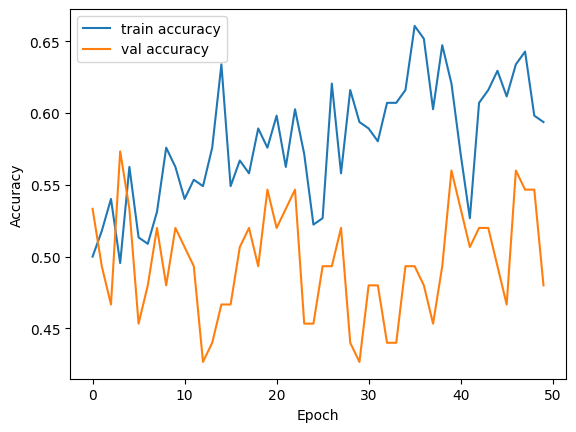

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(1200, 56), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt

# Gráfica del entrenamiento
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

